In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind


# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression


# Import API key. Renamed mine
#from api_keys_Yvonne import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Our Clean Netflix data (CSV)
output_data_file = "NetflixDF4.csv"

# Read the CSV
netflix_df = pd.read_csv(output_data_file)

# Display the data table for preview
netflix_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90.0
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104.0
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166.0
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103.0


In [2]:
netflix_df.rating.value_counts()

R        1604
PG-13    1207
PG        614
G          86
NR         47
Name: rating, dtype: int64

In [3]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3558 non-null   object 
 1   title         3558 non-null   object 
 2   release_year  3558 non-null   int64  
 3   type          3558 non-null   object 
 4   rating        3558 non-null   object 
 5   country       3558 non-null   object 
 6   genre         3558 non-null   object 
 7   duration      3558 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 222.5+ KB


In [4]:
# i am doing 3 different models based on country
# United States 
genre = "Dramas"
us_df = netflix_df.loc[(netflix_df['country'] == 'United States') & (netflix_df["genre"]== genre)]
us_df.head()


,show_id,title,release_year,type,rating,country,genre,duration
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
8,s43,Jaws 2,1978,Movie,PG,United States,Dramas,116.0
11,s49,Training Day,2001,Movie,R,United States,Dramas,122.0
29,s137,Cold Mountain,2003,Movie,R,United States,Dramas,154.0
30,s139,Dear John,2010,Movie,PG-13,United States,Dramas,108.0


In [5]:
#using hmk 5
corrs=us_df.corr()
corrs

,release_year,duration
release_year,1.00000,-0.18725
duration,-0.18725,1.00000


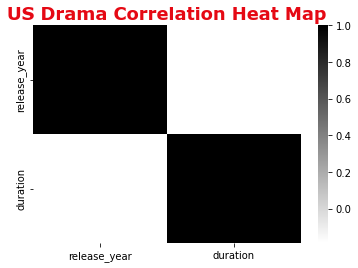

In [6]:
sns.heatmap(corrs, cmap = "binary")
plt.title("US Drama Correlation Heat Map",fontsize = 18, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.tight_layout
plt.savefig("FIG 1.US Drama Correlation Heat Map.png")
plt.show()

In [7]:
# ValueError: '#0A0903' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
#https://gallantlab.github.io/pycortex/colormaps.html

In [8]:
corr=(st.pearsonr(us_df['release_year'],us_df['duration']))
corr
print(f"The correlation between release year and duration is {corr}")

The correlation between release year and duration is (-0.18724992426751738, 0.00010502059858570537)


The r-squared is: 0.03506253413819103


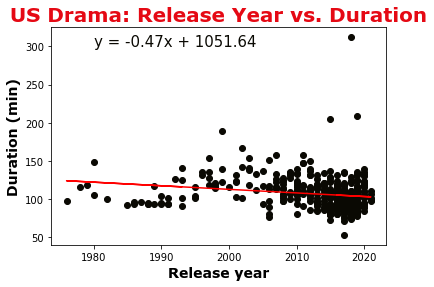

In [9]:
#linear regression model like in class activity day 3 act 9

x_values = us_df['release_year']
y_values = us_df['duration']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="#0A0903",marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1980,300),fontsize=15,color="#0A0903")
plt.xlabel('Release year',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel('Duration (min)',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title('US Drama: Release Year vs. Duration',fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 2.US Drama Release Year vs. Duration.png")
plt.show()

In [10]:
feature = us_df[["release_year"]]
target = us_df["duration"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\yvonne\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     15.33
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           0.000105
Time:                        16:58:28   Log-Likelihood:                -1893.3
No. Observations:                 424   AIC:                             3791.
Df Residuals:                     422   BIC:                             3799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1051.6416    241.286      4.358      0.000     577.370    1525.913
release_year    -0.4695      0.120     -3.916      0.000      -0.705      -0.234
==============================================================================
Omnibus:                      335.961   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10514.778
Skew:                           3.058   Prob(JB):                         0.00
Kurtosis:                      26.617   Cond. No.                     4.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# both my r2 are the same and my coeficcients

In [12]:
#SCIKIT_Learn
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-0.46945901]
1051.6415748146703


In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [14]:
actual = us_df["duration"]
predictions = reg.predict(us_df["release_year"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.03506253413819105
MSE: 442.7291067961774
RMSE: 21.041128933500154
MAE: 14.558332347944999


#booth
#5.7% of the variance of duration is explained by releas year

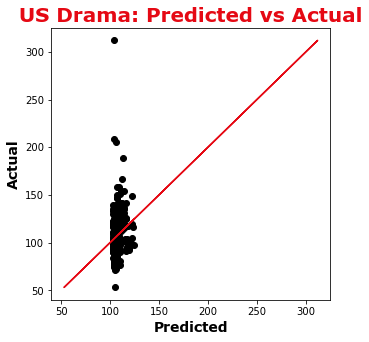

In [15]:
#questions about this one
plt.figure(figsize=(5,5))

plt.scatter(predictions, actual, c="black")
plt.plot(actual, actual,color="#E50914", )

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Actual",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("US Drama: Predicted vs Actual", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 3.US Drama Predicted vs Actual.png")
plt.show()

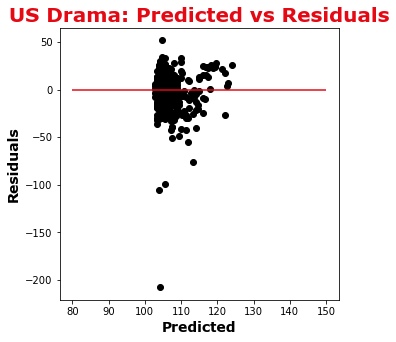

In [16]:
residuals = predictions - actual

plt.figure(figsize=(5,5))

plt.scatter(predictions, residuals,c="black")
plt.hlines(0, 80, 150,color="#E50914")

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Residuals",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("US Drama: Predicted vs Residuals", fontsize =20 , fontweight = "bold",fontname="Verdana", color = "#E50914")

plt.savefig("FIG 4.US Drama Predicted vs Residuals.png")
plt.show()

# #Next Genre Horror 

In [17]:
# i am doing 3 different models based on country
# United States 
genre = "Horror Movies"
us_df = netflix_df.loc[(netflix_df['country'] == 'United States') & (netflix_df["genre"]== genre)]
us_df.head()


,show_id,title,release_year,type,rating,country,genre,duration
5,s29,Dark Skies,2013,Movie,PG-13,United States,Horror Movies,97.0
84,s230,The Old Ways,2020,Movie,R,United States,Horror Movies,90.0
99,s308,Aftermath,2021,Movie,R,United States,Horror Movies,115.0
125,s354,The Haunting in Connecticut 2: Ghosts of Georgia,2013,Movie,R,United States,Horror Movies,101.0
196,s608,The Strangers,2008,Movie,R,United States,Horror Movies,85.0


In [18]:
#using hmk 5
corrs=us_df.corr()
corrs

,release_year,duration
release_year,1.000000,-0.419318
duration,-0.419318,1.000000


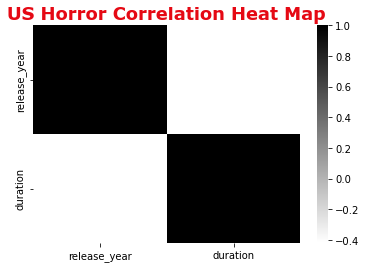

In [19]:
sns.heatmap(corrs, cmap = "binary")
plt.title("US Horror Correlation Heat Map",fontsize = 18, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 1.US Horror Correlation Heat map.png")
plt.show()

In [20]:
# ValueError: '#0A0903' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
#https://gallantlab.github.io/pycortex/colormaps.html

In [21]:
corr=(st.pearsonr(us_df['release_year'],us_df['duration']))
corr
print(f"The correlation between release year and duration is {corr}")

The correlation between release year and duration is (-0.419317642760424, 1.5298562117561868e-06)


The r-squared is: 0.17582728553015875


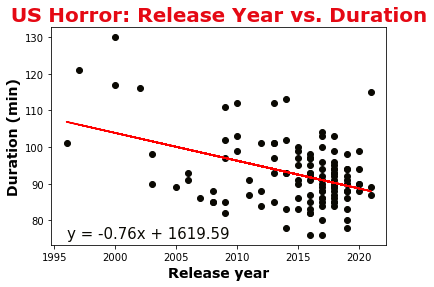

In [22]:
#linear regression model like in class activity day 3 act 9

x_values = us_df['release_year']
y_values = us_df['duration']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="#0A0903",marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1996,75),fontsize=15,color="#0A0903")
plt.xlabel('Release year',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel('Duration (min)',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title('US Horror: Release Year vs. Duration',fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 2.US Horror Release Year vs. Duration.png")
plt.show()

In [23]:
feature = us_df[["release_year"]]
target = us_df["duration"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\yvonne\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     25.60
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           1.53e-06
Time:                        16:58:30   Log-Likelihood:                -431.47
No. Observations:                 122   AIC:                             866.9
Df Residuals:                     120   BIC:                             872.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1619.5923    301.780      5.367      0.000    1022.089    2217.096
release_year    -0.7579      0.150     -5.060      0.000      -1.054      -0.461
==============================================================================
Omnibus:                        8.344   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.111
Skew:                           0.555   Prob(JB):                       0.0173
Kurtosis:                       3.603   Cond. No.                     8.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# both my r2 are the same and my coeficcients

In [25]:
#SCIKIT_Learn
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-0.75786519]
1619.5923296049596


In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [27]:
actual = us_df["duration"]
predictions = reg.predict(us_df["release_year"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.17582728553015847
MSE: 69.08548595559056
RMSE: 8.31176791997891
MAE: 6.40469504460793


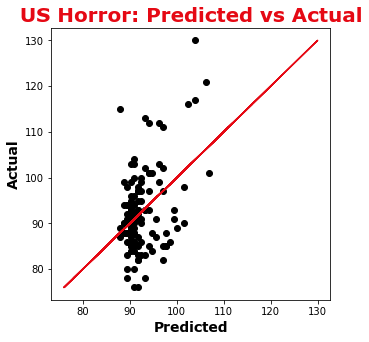

In [28]:
#questions about this one
plt.figure(figsize=(5,5))

plt.scatter(predictions, actual, c="black")
plt.plot(actual, actual,color="#E50914", )

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Actual",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("US Horror: Predicted vs Actual", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 3.US Horror Predicted vs Actual.png")
plt.show()

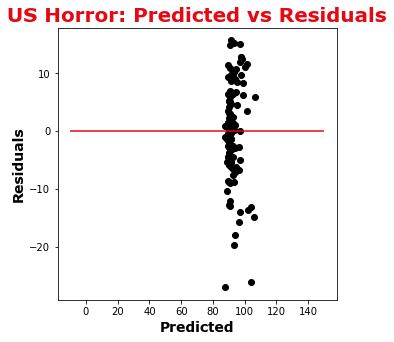

In [29]:
residuals = predictions - actual

plt.figure(figsize=(5,5))

plt.scatter(predictions, residuals,c="black")
plt.hlines(0, -10, 150,color="#E50914")

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Residuals",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("US Horror: Predicted vs Residuals", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 4.US Horror Predicted vs Residuals.png")
plt.show()

# #Next Genre Action and Adventure

In [30]:
# i am doing 3 different models based on country
# United States 
genre = "Action & Adventure"
us_df = netflix_df.loc[(netflix_df['country'] == 'United States') & (netflix_df["genre"]== genre)]
us_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
7,s42,Jaws,1975,Movie,PG,United States,Action & Adventure,124.0
9,s44,Jaws 3,1983,Movie,PG,United States,Action & Adventure,98.0
10,s45,Jaws: The Revenge,1987,Movie,PG-13,United States,Action & Adventure,91.0
12,s82,Kate,2021,Movie,R,United States,Action & Adventure,106.0
26,s132,Blade Runner: The Final Cut,1982,Movie,R,United States,Action & Adventure,117.0


In [31]:
#using hmk 5
corrs=us_df.corr()
corrs

,release_year,duration
release_year,1.00000,-0.23341
duration,-0.23341,1.00000


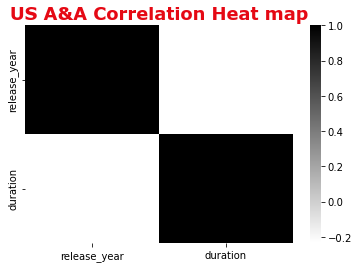

In [32]:
sns.heatmap(corrs, cmap = "binary")
plt.title("US A&A Correlation Heat map",fontsize = 18, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 1.US A&A Correlation Heat Map.png")
plt.show()

In [33]:
# ValueError: '#0A0903' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
#https://gallantlab.github.io/pycortex/colormaps.html

In [34]:
corr=(st.pearsonr(us_df['release_year'],us_df['duration']))
corr
print(f"The correlation between release year and duration is {corr}")

The correlation between release year and duration is (-0.23340955134491032, 2.399499566369145e-05)


The r-squared is: 0.05448001865903222


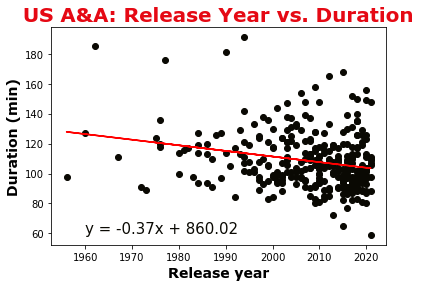

In [35]:
#linear regression model like in class activity day 3 act 9

x_values = us_df['release_year']
y_values = us_df['duration']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="#0A0903",marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1960,60),fontsize=15,color="#0A0903")
plt.xlabel('Release year',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel('Duration (min)',fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title('US A&A: Release Year vs. Duration',fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("FIG 2.US A&A Release Year vs. Duration.png")
plt.show()

In [36]:
feature = us_df[["release_year"]]
target = us_df["duration"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\yvonne\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     18.38
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           2.40e-05
Time:                        16:58:32   Log-Likelihood:                -1395.4
No. Observations:                 321   AIC:                             2795.
Df Residuals:                     319   BIC:                             2802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          860.0160    175.316      4.906      0.000     515.094    1204.938
release_year    -0.3743      0.087     -4.287      0.000      -0.546      -0.203
==============================================================================
Omnibus:                       59.585   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.087
Skew:                           1.060   Prob(JB):                     1.85e-22
Kurtosis:                       4.730   Cond. No.                     3.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# both my r2 are the same and my coeficcients

In [38]:
#SCIKIT_Learn
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-0.37433151]
860.0160057237797


In [39]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [40]:
actual = us_df["duration"]
predictions = reg.predict(us_df["release_year"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.05448001865903207
MSE: 349.3986526893522
RMSE: 18.692208341695537
MAE: 14.111974842919325


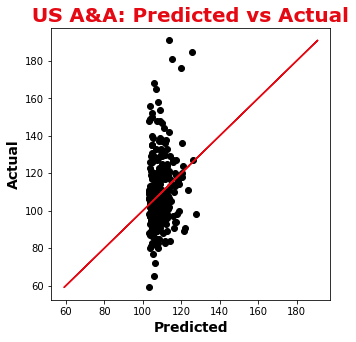

In [41]:
#questions about this one
plt.figure(figsize=(5,5))

plt.scatter(predictions, actual, c="black")
plt.plot(actual, actual,color="#E50914", )

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Actual",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("US A&A: Predicted vs Actual", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 3.US A&A Predicted vs Actual.png")
plt.show()

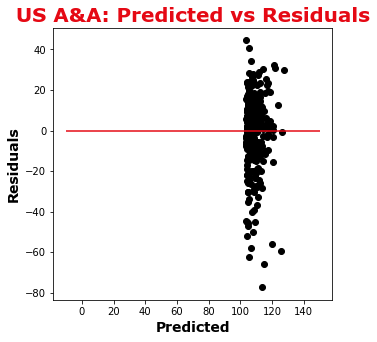

In [42]:
residuals = predictions - actual

plt.figure(figsize=(5,5))

plt.scatter(predictions, residuals,c="black")
plt.hlines(0,-10, 150,color="#E50914")

plt.xlabel("Predicted",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Residuals",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("US A&A: Predicted vs Residuals", fontsize = 20, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.savefig("FIG 4.US A&A Predicted vs Residuals.png")
plt.show()